In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)
psi=numpy.zeros((ny, nx))
l1_target = 1e-6

x  = numpy.linspace(0,1,nx)
y  = numpy.linspace(0,1,ny)
X,Y = numpy.meshgrid(x,y)
omega=numpy.zeros((ny, nx))
omega[:,:]=1


In [3]:
def conjugate_gradient_2d(psi, omega, dx, dy, l1_target):
    '''Performs cg relaxation
    Assumes Dirichlet boundary conditions p=0
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l2_target: float
        exit criterion
        
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    ny, nx = psi.shape
    r  = numpy.zeros((ny,nx)) # residual
    Ad  = numpy.zeros((ny,nx)) # to store result of matrix multiplication 
    
    l1_norm = 1
    #iterations = 0
    l1_conv = []
    
    # Step-0 We compute the initial residual and 
    # the first search direction is just this residual
    
    
    
    # Iterations
    while l1_norm > l1_target:
        
            # Step-0 We compute the initial residual and 
            # the first search direction is just this residual
        
        omega_l1_norm = 1
        #omega_iterations = 0
        omega_l1_conv = []
    
        while omega_l1_norm > l1_target:

            omegad = omega.copy()

            omega[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((omegad[1:-1,2:]+omegad[1:-1,:-2])*dy**2 +\
                        (omegad[2:,1:-1] + omegad[:-2,1:-1])*dx**2)
    
            # BCs to be enforced
            #top
            omega[-1,1:-1] = -1./(2*dy**2) * (8*psi[-2,1:-1]-psi[-3,1:-1])-3/dy
            #bottom
            omega[0,1:-1] = -1./(2*dy**2) * (8*psi[1,1:-1]-psi[2,1:-1])# if incorrect check this step in calculation.
            #left
            omega[1:-1,0] = -1./(2*dx**2) * (8*psi[1:-1,1]-psi[1:-1,2])
            #right
            omega[1:-1,-1] = -1./(2*dx**2) * (8*psi[1:-1,-2]-psi[1:-1,-3])
        
            omega_l1_norm = L1norm(omegad,omega)
        
        r[1:-1,1:-1] = -omega[1:-1,1:-1] + (4*psi[1:-1,1:-1] - \
        psi[1:-1,2:] - psi[1:-1,:-2] - psi[2:, 1:-1] - psi[:-2, 1:-1])/dx**2
        d = r.copy()
        rho = numpy.sum(r*r)
        Ad[1:-1,1:-1] = (-4*d[1:-1,1:-1]+d[1:-1,2:]+d[1:-1,:-2]+\
        d[2:, 1:-1] + d[:-2, 1:-1])/dx**2
        sigma = numpy.sum(d*Ad)

        psik = psi.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        psi = psik + alpha*dk
        r = rk- alpha*Ad
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        Ad[1:-1,1:-1] = (-4*d[1:-1,1:-1] + d[1:-1,2:] + d[1:-1,:-2] + \
            d[2:, 1:-1] + d[:-2, 1:-1])/dx**2
        sigma = numpy.sum(d*Ad)
        
        # BCs are automatically enforced (only Dirichlet bc for psi)
        
        l1_norm = L1norm(psik,psi)
        #iterations += 1
        l1_conv.append(l1_norm)
    
    #print('Number of CG iterations: {0:d}'.format(iterations))
    pyplot.figure(figsize=(8,5))
    pyplot.contourf(X,Y,psik,20,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar(); 
    # the following code helps to find the maximum absolute value of a 2 D array (needed for questions in module 5)
    psikmax = psik.flat[abs(psik).argmax()]
    print(psikmax)
    omegadmax = omegad.flat[abs(omegad).argmax()]
    print(omegadmax)
    print(numpy.round(psik[32,::8], 4))

In [4]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

-0.0998450732002
-78.1926607994
[ 0.     -0.0575 -0.0944 -0.0944 -0.0575  0.    ]


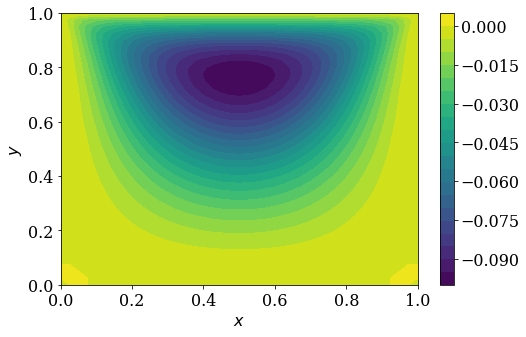

In [5]:
 conjugate_gradient_2d(psi, omega, dx, dy, l1_target)